In [1]:
import pandas as pd

# Read in the data with `read_csv()'
data = pd.read_csv('CleanedData.csv')
data.tail()

,Unnamed: 0,CleanRide_review,ride_rating,sentiment
3686,3686,everyone know uber fast couple drink night wan...,2,0
3687,3687,service asks credit card number right bat real...,1,0
3688,3688,great service hiring driver know way around to...,2,0
3689,3689,uber several problem make poor experience cons...,1,0
3690,3690,uber kind like magic punch button app phone wa...,5,1


In [2]:
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,CleanRide_review,ride_rating,sentiment
0,accident uber driver mexico city car got side ...,1,0
1,account completely hacked sign view someone sp...,1,0
2,requested mile ride boston saturday night arou...,1,0
3,'ve driving company since since driving new pl...,1,0
4,uber overcharging toll fee florida toll fee es...,1,0


In [3]:
data.dtypes

CleanRide_review    object
ride_rating          int64
sentiment            int64
dtype: object

In [4]:
data.describe()

,ride_rating,sentiment
count,3691.000000,3691.000000
mean,1.664860,0.145218
std,1.326449,0.352368
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,5.000000,1.000000


In [5]:
#check for incomplete or null data
null_count = data.isnull().sum()
null_count

CleanRide_review    0
ride_rating         0
sentiment           0
dtype: int64

# Data visualization

In [6]:
#divide the ride_rating into groups
groups = data.groupby('ride_rating').count()
groups

,CleanRide_review,sentiment
ride_rating,,
1,2818,2818
2,187,187
3,150,150
4,177,177
5,359,359


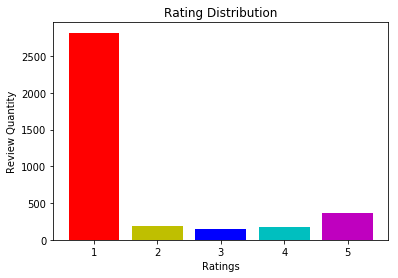

In [8]:
#%matplotlib inline
import matplotlib.pyplot as plt
value = groups.CleanRide_review
colors = ['r','y','b','c','m']
#plotting bar graph
plt.bar(([1,2,3,4,5]),value,color = colors)
plt.title('Rating Distribution')
plt.xlabel('Ratings')
plt.ylabel('Review Quantity')
plt.show()

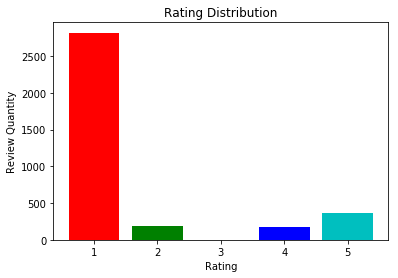

In [9]:
#deleting all instances with ride_rating = 3
data = data[data.ride_rating != 3]

#seperating by groups
groups = data.groupby('ride_rating').count()
Values = groups.CleanRide_review
colors = ['r', 'g', 'b', 'c']

#making bar plot
plt.bar(([1,2,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

In [10]:
#create a binary class which is a copy of sentiment class but without 3 star rating
import numpy as np
data['binary_class'] = np.where(data['ride_rating']>3,1,0)
data

,CleanRide_review,ride_rating,sentiment,binary_class
0,accident uber driver mexico city car got side ...,1,0,0
1,account completely hacked sign view someone sp...,1,0,0
2,requested mile ride boston saturday night arou...,1,0,0
3,'ve driving company since since driving new pl...,1,0,0
4,uber overcharging toll fee florida toll fee es...,1,0,0
5,airport flight today uber would accept credit ...,1,0,0
6,worked uber lyft year take take take driver at...,1,0,0
7,july year sushi delivered mexico ubereats subs...,1,0,0
8,driver rohan nice tried add tip noticed switch...,1,0,0
9,seven fraudulent uber transaction three day mi...,1,0,0


# Divide the data into training and test sets

In [11]:
from sklearn.model_selection import train_test_split
import random

X_train, X_test, y_train, y_test = train_test_split(data['CleanRide_review'], data['binary_class'],test_size = 0.20, random_state = 0)
#print(data.ride_review.count())

count = X_train.count().sum()
print(count)
number = random.randint(1,count)
#print(number)
print('Random Review:')
print(' ')
#random review
print(X_train[number].strip())

2832
Random Review:
 
requested ride uber nail salon stop starbucks way .. ended cancel stop go straight nail salon checked app price charged .. disputed chat apparently way contact told charge valid made change y'all telling shortening ride increased price almost spoke several different people issue half either called wrong situation incorrectly end result uber simply ignoring last message absolutely floored way treat customer


# Vectorization

In [12]:
#importing countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

#creating variable which assigns X_train to numbers
vect = CountVectorizer().fit(X_train)

#translates numbers back to text
vect.get_feature_names()[1:10]

['aadvantage',
 'aapd',
 'aashish',
 'abandoned',
 'abdelmutaleb',
 'abhi',
 'ability',
 'able',
 'abobacar']

In [13]:
#length of total words
len(vect.get_feature_names())

7935

In [14]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Create Logistic Regression model

In [16]:
#creating log regression
from sklearn.linear_model import LogisticRegression
LogModel = LogisticRegression()
LogModel.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Checking Accuracy

In [17]:
#calculating AUC of Random forest
from sklearn.metrics import roc_auc_score
predictions = LogModel.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9255003654354305


# Creating RamdomForest model


In [18]:
# Creating Random Forest Model
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(n_estimators=20)
model_1.fit(X_train_vectorized, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Checking Accuracy

In [19]:
#calculating AUC of Random forest
from sklearn.metrics import roc_auc_score
predictions = model_1.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8677685950413223


In [20]:
#creating array variable of all the words
feature_names = np.array(vect.get_feature_names())

#creating array of all the regression coefficients per word
coef_index = LogModel.coef_[0]

#creating df with both arrays in it
df = pd.DataFrame({'Word':feature_names, 'Coef': coef_index})

#sorting by coefficient
df.sort_values('Coef')

,Word,Coef
1079,charged,-1.487548
6950,tell,-0.997664
6090,scam,-0.971409
1631,customer,-0.965412
4573,never,-0.943761
7269,two,-0.921745
943,call,-0.915602
2546,fee,-0.909905
4106,lyft,-0.899102
4799,order,-0.797028


# Making Prediction(1: Positive , 0 : Negative) on Random Forest model

In [21]:
print(model_1.predict(vect.transform(['Its really quick and i enjoy the ride alot'])))
print(model_1.predict(vect.transform(['great she the best'])))
print(model_1.predict(vect.transform(['charged slow horrible'])))
print(model_1.predict(vect.transform(['it was as average as a trip could be'])))
print(model_1.predict(vect.transform(['my family felt safe we got to our destination with ease'])))
print(model_1.predict(vect.transform(['i got to my destination quickly and affordably i had a smile on my face from start to finish'])))

[1]
[0]
[0]
[0]
[1]
[0]


# Making Prediction(1: Positive , 0 : Negative) on Logistic Regression model

In [22]:
print(LogModel.predict(vect.transform(['abandoned great'])))
print(LogModel.predict(vect.transform(['great she the best'])))
print(LogModel.predict(vect.transform(['charged slow horrible'])))
print(LogModel.predict(vect.transform(['it was as average as a trip could be'])))
print(LogModel.predict(vect.transform(['my family felt safe we got to our destination with ease'])))
print(LogModel.predict(vect.transform(['i got to my destination quickly and affordably i had a smile on my face from start to finish'])))

[1]
[1]
[0]
[0]
[1]
[1]
